In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("candy-data1.csv", delimiter = ",", index_col = "competitorname")
test_data = pd.read_csv("candy-test1.csv", delimiter = ",", index_col = "competitorname")

In [3]:
from sklearn.linear_model  import LogisticRegression

In [5]:
data_to_train = train_data.drop(["Nestle Crunch", "Skittles wildberry", "Sour Patch Tricksters"])

In [6]:
X = pd.DataFrame(data_to_train.drop(['winpercent', 'Y'], axis=1))
Y = pd.DataFrame(data_to_train["Y"])

In [8]:
LR = LogisticRegression(random_state=2019, solver='lbfgs').fit(X,Y.values.ravel())

In [9]:
trolliSourBites = test_data.loc["Trolli Sour Bites",:].to_frame().T
twizzlers = test_data.loc["Twizzlers",:].to_frame().T

In [12]:
LR.predict_proba(trolliSourBites.drop(['Y'],axis=1))

array([[0.70832211, 0.29167789]])

In [13]:
LR.predict_proba(twizzlers.drop(['Y'],axis=1))

array([[0.6962054, 0.3037946]])

In [36]:
X_test = pd.DataFrame(test_data.drop(['Y'],axis=1))

In [37]:
y = LR.predict(X_test)

In [38]:
y_prob = LR.predict_proba(X_test)

In [39]:
y_prob_class1 = y_prob[:,1]

In [40]:
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [41]:
from sklearn import metrics

In [42]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [43]:
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [44]:
fpr, tpr, _ = metrics.roc_curve(Y_true, y)

In [45]:
metrics.roc_auc_score(Y_true, y_prob_class1)

0.84

In [46]:
metrics.precision_score(Y_true, y)

0.5

In [47]:
metrics.recall_score(Y_true, y)

0.6

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

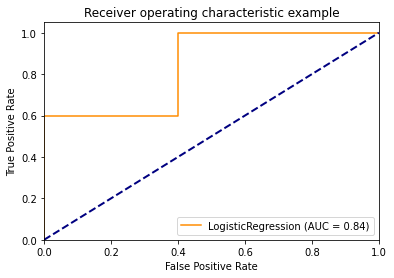

In [50]:
metrics.plot_roc_curve(LR, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()
